# Praca domowa 1

### Konstanty Kraszewski

Eksploracja zbioru danych `students.csv`. Opisy kolumn dostępne [tutaj](https://www.kaggle.com/uciml/student-alcohol-consumption).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [17]:
data = pd.read_csv('../students.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


Dane składają się z 34 kolumn, w tym 29 kategorycznych i 5 numerycznych.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Nie widać na razie żadnych braków danych. 18 zmiennych kategorycznych wymaga zamiany (zastosowania kodowania) na wartości liczbowe.

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


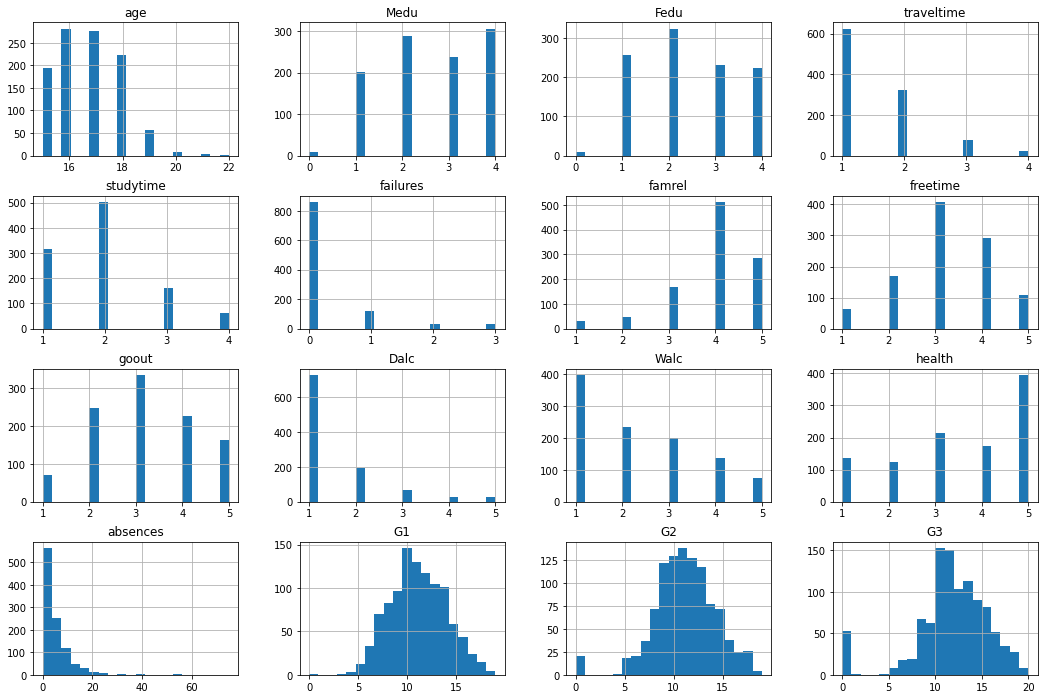

In [9]:
data.hist(bins = 20, figsize = (18,12))
plt.show()

Rozkłady zmiennych `G1`, `G2` i `G3` wyglądają na zbliżone do rozkładu normalnego.

### Przydatne narzędzie do analizy - Pandas Profiling Report: dużo statystyk, informacje o zmiennych, korelacje, brakujące wartości, ...

In [6]:
profile = ProfileReport(data, title='Pandas Profiling Report')
profile.to_widgets()

* Przeglądając wartości poszczególnych zmiennych nie widać żadnych, które mialibyśmy traktować jako braki danych poza zmiennymi `G2` i `G3`, w przypadku których występuje wiele wartości 0 niepasujących do rozkładu zmiennej. Ponadto wszyscy uczniowie o wartości 0 zmiennej `G2` mają wartość zero również w zmiennej `G3`. Ta sytuacja nie występuje jednak w przypadku zmiennej `G1`. Hipoteza: nie wszyscy uczniowie przystąpili do kolejnych testów.

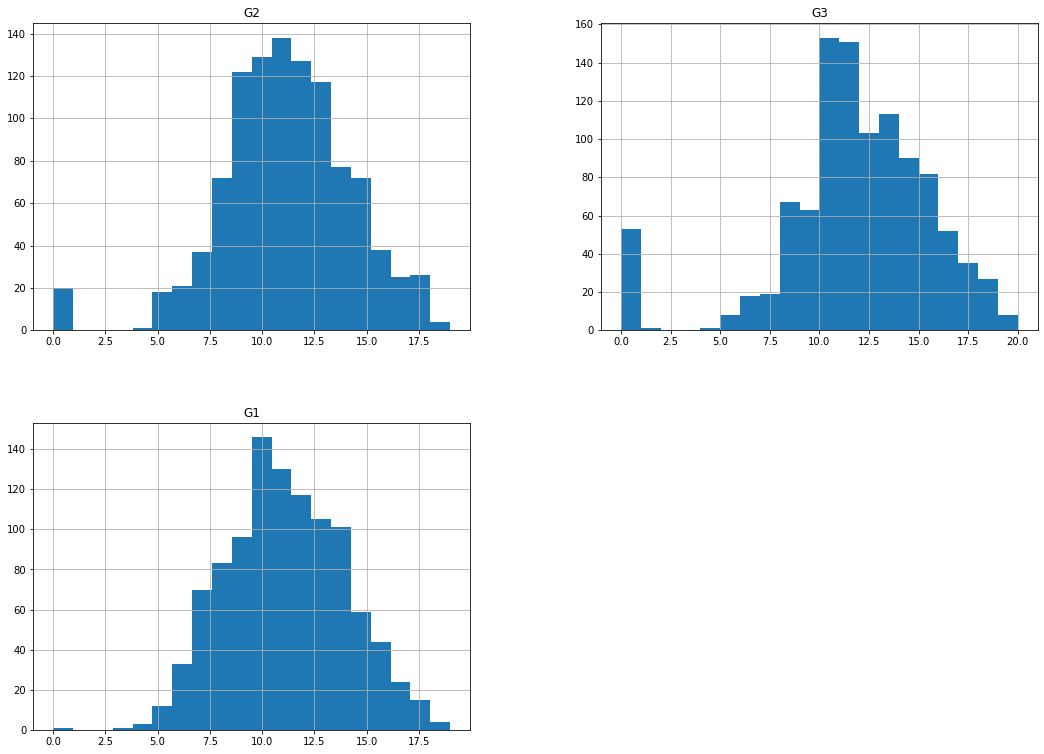

In [74]:
data[['G2','G3', 'G1']].hist(bins = 20, figsize = (18,13))
plt.show()

In [73]:
data.loc[data['G2'] == 0, ['G2','G3']]

,G2,G3
130,0,0
131,0,0
134,0,0
135,0,0
136,0,0
137,0,0
144,0,0
153,0,0
162,0,0
242,0,0


* Zmienna `absences` ma bardzo dużo wartości blisko zera i niewiele dużych wartości - można rozważyć przeskalowanie zmiennej.

<AxesSubplot:>

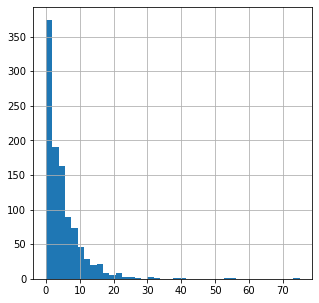

In [81]:
data['absences'].hist(bins = 40, figsize = (5,5))

* Widać silną zależność pomiędzy wynikami kolejnych testów (zmiennymi `G1`, `G2` i `G3`).

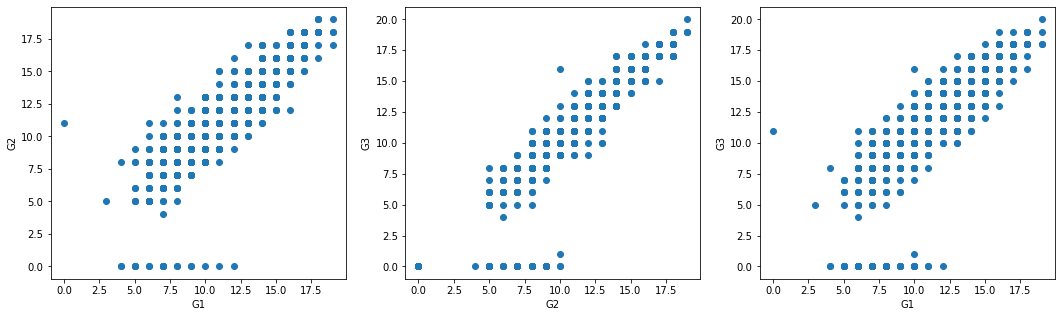

In [100]:
plt.figure(figsize = (18,5))
plt.subplot(131)
plt.plot(data['G1'], data['G2'],'o')
plt.xlabel('G1')
plt.ylabel('G2')
plt.subplot(132)
plt.plot(data['G2'], data['G3'],'o')
plt.xlabel('G2')
plt.ylabel('G3')
plt.subplot(133)
plt.plot(data['G1'], data['G3'],'o')
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

* Korelacje znajdujemy także między zmiennymi opisującymi wykształcenie rodziców (`Medu` i `Fedu`) i spożycie alkoholu (`Dalc` i `Walc`).

* Mniejsza, ale również zauważalna korelacja (ujemna) występuje także pomiędzy wynikami a liczbą poprzednio niezaliczonych zajęć (`failures`).

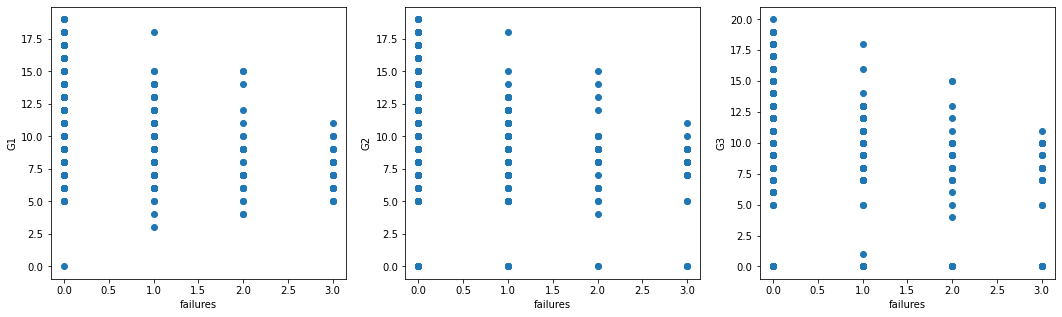

In [101]:
plt.figure(figsize = (18,5))
plt.subplot(131)
plt.plot(data['failures'], data['G1'],'o')
plt.xlabel('failures')
plt.ylabel('G1')
plt.subplot(132)
plt.plot(data['failures'], data['G2'],'o')
plt.xlabel('failures')
plt.ylabel('G2')
plt.subplot(133)
plt.plot(data['failures'], data['G3'],'o')
plt.xlabel('failures')
plt.ylabel('G3')
plt.show()